# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
[OK] numpy 1.24.3
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Example 6 - Wine Dataset (LDA)

### Overview

- [Importing libraries for data analysis and scaling](#importing-libraries-for-data-analysis-and-scaling)
- [Extracting the principal components step by step](#extracting-the-principal-components-step-by-step)
- [Computing the scatter matrices](#computing-the-scatter-matrices)
- [Selecting linear discriminants for the new feature subspace](#selecting-linear-discriminants-for-the-new-feature-subspace)
- [Projecting examples onto the new feature space](#projecting-examples-onto-the-new-feature-space)
- [LDA via scikit-learn](#lda-via-scikit-learn)
- [Summary](#summary)

In [3]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## Importing libraries for data analysis and scaling

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Extracting the principal components step by step

In [5]:
# Download the wine dataset from the UCI Machine Learning Repository
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)

In [6]:
# Show the first five rows of the dataset
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Show the shape of the dataset
df_wine.shape

(178, 14)

In [8]:
# Splitting the dataset into features and target variable
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # Target variable is the first column

In [9]:
# Splitting the dataset into training and test sets
# stratify=y makes sure that the training and test datasets have the same class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0) # 30% test data

In [10]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Computing the scatter matrices

In [11]:
# Compute one mean vector for each label
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]

MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]

MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]



In [12]:
# Compute the within-class scatter matrix
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    
print(f'Within-class scatter matrix: {S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [13]:
# Calculate the between-class scatter matrix
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot(
        (mean_vec - mean_overall).T)

print('Between-class scatter matrix: ' f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace

In [14]:
# Calculate the eigenvalues and eigenvectors of the matrix 𝑺𝑊−1·𝑺𝐵 :
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


In [16]:
# Construct the projection matrix 
# In this case, we will reduce the high-dimensional feature space to a 2-dimensional feature subspace
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14808266 -0.40918668]
 [ 0.09076942 -0.15765978]
 [-0.01678204 -0.35371242]
 [ 0.14840098  0.32231568]
 [-0.0163456  -0.08168973]
 [ 0.19130756  0.08419165]
 [-0.73377547  0.28234956]
 [-0.07501992 -0.01015645]
 [ 0.00184929  0.09065024]
 [ 0.29402743 -0.2152308 ]
 [-0.03282632  0.27470975]
 [-0.35466909 -0.01243875]
 [-0.39151562 -0.59578685]]


## Projecting examples onto the new feature space

In [17]:
# Transform the first element of the training dataset using the projection matrix
X_train_std[0].dot(w)

array([ 1.31763265, -0.64040545])

In [18]:
# Transform the entire training dataset using the projection matrix
X_train_lda = X_train_std.dot(w)

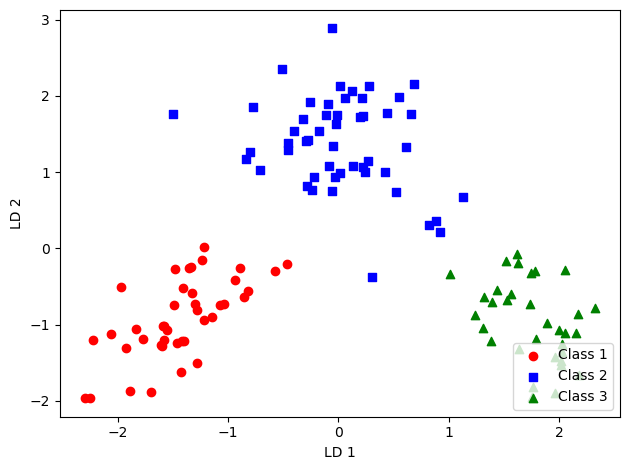

In [19]:
# Visualize the transformed  training dataset in a two-dimensional scatterplot
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [20]:
# Auxiliar function to plot the decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

## LDA via scikit-learn

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


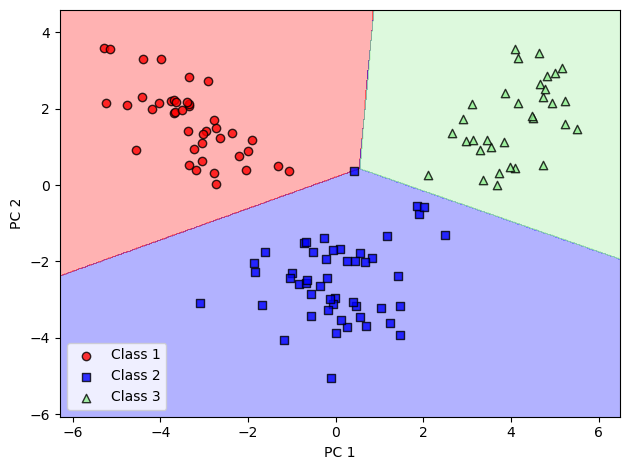

In [21]:
# scikit-learn
# Initializing the LDA transformer
lda = LDA(n_components=2)

# Initializing the logistic regression estimator:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs') # ovr = One-vs-Rest, lbfgs = Limited-memory Broyden-Fletcher-Goldfarb-Shanno

# Dimensionality reduction
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_lda, y_train)

# Plotting the decision regions in the reduced space for the training dataset
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

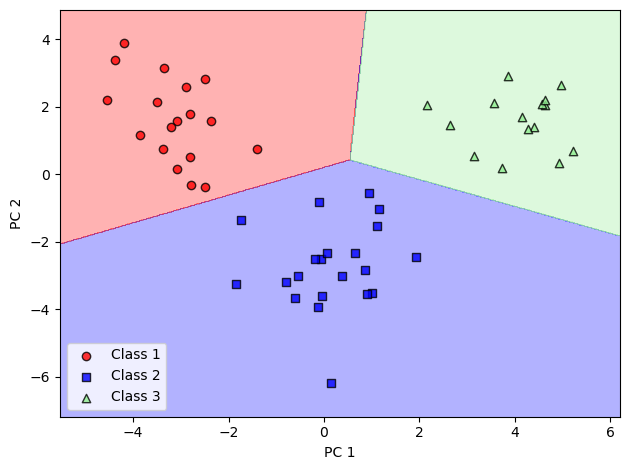

In [22]:
# scikit-learn
# Plotting the decision regions in the reduced space for the test dataset
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Summary

---

Readers may ignore the next cell.

In [23]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex06.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex06.ipynb.
# * --output ex06.py
# This option tells the script to save the output (the converted file) with the name
# ex06.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex06.ipynb --output ex06.py

[NbConvertApp] Converting notebook ex06.ipynb to script
[NbConvertApp] Writing 10877 bytes to ex06.py
